**Reading the Dataaset**

The first step is to have a peek at the data

In [ ]:
import pandas as pd
co_dataset=pd.read_csv('/content/Nova_Scotia_Provincial_Ambient_Carbon_Monoxide__CO__Hourly_Data_Halifax_Johnston (1).csv')
co_dataset.head(20)

,Date & Time,Pollutant,Unit,Station,Average
0,01/01/2019 12:00:00 AM,CO,ppm,Halifax Johnston,0.25
1,01/01/2019 01:00:00 AM,CO,ppm,Halifax Johnston,0.26
2,01/01/2019 02:00:00 AM,CO,ppm,Halifax Johnston,0.20
3,01/01/2019 03:00:00 AM,CO,ppm,Halifax Johnston,0.17
4,01/01/2019 04:00:00 AM,CO,ppm,Halifax Johnston,0.15
5,01/01/2019 05:00:00 AM,CO,ppm,Halifax Johnston,0.14
6,01/01/2019 06:00:00 AM,CO,ppm,Halifax Johnston,0.14
7,01/01/2019 07:00:00 AM,CO,ppm,Halifax Johnston,0.12
8,01/01/2019 08:00:00 AM,CO,ppm,Halifax Johnston,0.12
9,01/01/2019 09:00:00 AM,CO,ppm,Halifax Johnston,0.12


In [ ]:
traffic_dataset=pd.read_csv("cleaned_traffic_data.csv")
traffic_dataset.head(20)

,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT
0,2019-09-09,1,47,4.50,2.566,2.430
1,2019-06-17,1,50,7.60,4.266,3.840
2,2019-06-17,1,50,7.60,3.934,3.545
3,2019-06-17,1,50,7.60,2.924,2.640
4,2019-09-09,1,50,7.60,6.164,5.520
5,2019-06-17,1,50,7.60,2.984,2.690
6,2019-09-16,1,60,4.61,4.351,3.880
7,2019-09-09,1,65,9.75,2.074,1.780
8,2019-09-09,1,70,3.67,4.079,3.650
9,2019-09-09,1,80,8.96,2.233,2.000


Dimensions of the data
More columns might distract the model due to curse of dimensionality and less rows might be responsible for poor model  

In [ ]:
print("Dimensions of traffic  dataset are:-", traffic_dataset.shape)
print("Dimensions of CO  dataset are:-", co_dataset.shape)

Dimensions of traffic  dataset are:- (586, 6)
Dimensions of CO  dataset are:- (236687, 5)


Data type of each attribute Strings may need to be converted to floating values or integers to represent categorical or ordinal values

In [ ]:
print("Data types of traffic dataset are")
print(traffic_dataset.dtypes)

Data types of traffic dataset are
Date               object
HIGHWAY             int64
SECTION             int64
SECTION LENGTH    float64
ADT               float64
AADT              float64
dtype: object


In [ ]:
print("Data types of CO dataset are")
print(co_dataset.dtypes)

Data types of CO dataset are
Date & Time     object
Pollutant       object
Unit            object
Station         object
Average        float64
dtype: object


As we can see in CO dataset Unit,pollutant and station are not useful beacuse all have mostly single values so we will drop them and also as our traffic dataset has data that is dte wise so we will extract only the dates from the date and time column of CO dataset and we will average the Average attribute for each date 

In [ ]:
co_dataset['just_date'] = pd.to_datetime(co_dataset['Date & Time']).dt.strftime('%m/%d/%Y')

In [ ]:
co_dataset_processed=co_dataset.groupby(pd.Grouper(key='just_date',axis=0)).mean()
print(co_dataset_processed.head(20))

             Average
just_date           
01/01/2019  0.146250
01/02/2019  0.152917
01/03/2019  0.198333
01/04/2019  0.178333
01/05/2019  0.197083
01/06/2019  0.159167
01/07/2019  0.150000
01/08/2019  0.165833
01/09/2019  0.136667
01/10/2019  0.171667
01/11/2019  0.148750
01/12/2019  0.150833
01/13/2019  0.157083
01/14/2019  0.194583
01/15/2019  0.161667
01/16/2019  0.201250
01/17/2019  0.171667
01/18/2019  0.163333
01/19/2019  0.151667
01/20/2019  0.120000


Converting the date to our required format

In [ ]:
traffic_dataset['Date']=pd.to_datetime(traffic_dataset['Date'])

traffic_dataset['Date']=traffic_dataset['Date'].dt.strftime('%m/%d/%Y')
traffic_dataset

,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT
0,09/09/2019,1,47,4.50,2.566,2.430
1,06/17/2019,1,50,7.60,4.266,3.840
2,06/17/2019,1,50,7.60,3.934,3.545
3,06/17/2019,1,50,7.60,2.924,2.640
4,09/09/2019,1,50,7.60,6.164,5.520
...,...,...,...,...,...,...
581,06/27/2019,374,28,6.83,241.000,220.000
582,06/27/2019,374,30,11.04,488.000,440.000
583,06/04/2019,376,10,5.68,1.409,1.320
584,05/28/2019,376,20,5.96,2.215,2.080


Merging the two dataset. We will merge the two dataset on date 

In [ ]:
merged_dataset=pd.merge(traffic_dataset,co_dataset_processed,left_on='Date',right_on='just_date')


Having a look at the merged dataset

In [ ]:
merged_dataset.head(20)

,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,Average
0,09/09/2019,1,47,4.50,2.566,2.430,0.122174
1,09/09/2019,1,50,7.60,6.164,5.520,0.122174
2,09/09/2019,1,65,9.75,2.074,1.780,0.122174
3,09/09/2019,1,70,3.67,4.079,3.650,0.122174
4,09/09/2019,1,80,8.96,2.233,2.000,0.122174
5,09/09/2019,202,5,7.45,421.000,380.000,0.122174
6,09/09/2019,202,5,7.45,419.000,370.000,0.122174
7,09/09/2019,202,7,8.32,581.000,520.000,0.122174
8,09/09/2019,215,40,5.42,2.430,2.170,0.122174
9,06/17/2019,1,50,7.60,4.266,3.840,0.144167


Analysing the merged dataset

In [ ]:
print("Data types of Merged dataset are")
print(merged_dataset.dtypes)
print("Shape of Merged dataset are")
print(merged_dataset.shape)

Data types of Merged dataset are
Date               object
HIGHWAY             int64
SECTION             int64
SECTION LENGTH    float64
ADT               float64
AADT              float64
Average           float64
dtype: object
Shape of Merged dataset are
(586, 7)


Descriptive Statistics of the datasets

In [ ]:
pd.set_option('display.max_columns', None)
description = merged_dataset.describe()
print(description)

          HIGHWAY     SECTION  SECTION LENGTH         ADT       AADT  \
count  586.000000  586.000000      586.000000  586.000000  586.00000   
mean   148.576792   52.779863        7.401891  197.050370  212.73780   
std    125.552938   56.718809        3.981491  304.282428  303.89292   
min      1.000000    1.000000        0.200000    1.004000    1.00000   
25%      7.000000   17.000000        4.150000    2.838750    3.60000   
50%    104.000000   30.000000        7.253500    8.162000   10.95000   
75%    245.000000   60.000000       10.040000  381.500000  430.00000   
max    376.000000  270.000000       20.720000  995.000000  990.00000   

          Average  
count  586.000000  
mean     0.112084  
std      0.024675  
min      0.045417  
25%      0.092917  
50%      0.110833  
75%      0.124583  
max      0.186875  


Correlation between attributes in a dataset  linear and logistic regression can suffer poor performance if there are highly correlated attributes in your datase

In [ ]:
correlations = merged_dataset.corr(method='pearson')
print(correlations)

                 HIGHWAY   SECTION  SECTION LENGTH       ADT      AADT  \
HIGHWAY         1.000000 -0.386533        0.179073  0.199711  0.234263   
SECTION        -0.386533  1.000000       -0.077969 -0.182410 -0.217007   
SECTION LENGTH  0.179073 -0.077969        1.000000  0.280939  0.285422   
ADT             0.199711 -0.182410        0.280939  1.000000  0.780457   
AADT            0.234263 -0.217007        0.285422  0.780457  1.000000   
Average        -0.073669  0.027754        0.077435 -0.008396 -0.049260   

                 Average  
HIGHWAY        -0.073669  
SECTION         0.027754  
SECTION LENGTH  0.077435  
ADT            -0.008396  
AADT           -0.049260  
Average         1.000000  


Visualization of data

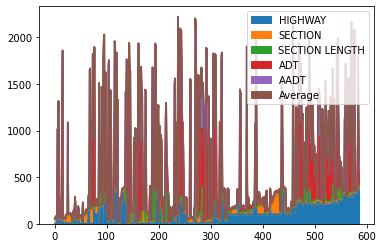

In [ ]:
import matplotlib.pyplot as pl
merged_dataset.plot.area()

Here we can see that there is a good amount of correlation between ADT and AADT whichh is not good foe the Linear Regression model

**Task 2**

**1)Describe how the linear regression algorithm works.**


We will divide the dataset on the basis of months so all the entries with months as November and december are test dataset

In [ ]:
 test_dataset= merged_dataset[(pd.DatetimeIndex(merged_dataset['Date']).month>10)]
 train_dataset=merged_dataset[~(pd.DatetimeIndex(merged_dataset['Date']).month>10)]

For the independent variables we do not need date at all as we are not doing anything related o time series here.

In [ ]:
X_train=train_dataset.drop(columns=['Date','Average'])
y_train=train_dataset['Average']
X_test=test_dataset.drop(columns=['Date','Average'])
y_test=test_dataset['Average']

The below code shows how much each independent feature is dependent on the dependent variable

Feature HIGHWAY: 2.424789
Feature SECTION: 0.025263
Feature SECTION LENGTH: 3.698173
Feature ADT: 0.002266
Feature AADT: 0.940353


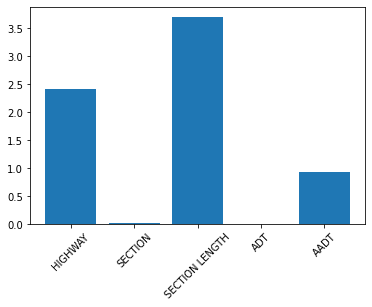

In [ ]:
#reference:-https://machinelearningmastery.com/feature-selection-for-regression-data/
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# selecting
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_regression, k=3)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

feature_names=X_train.columns
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (feature_names[i], fs.scores_[i]))
pyplot.xticks(rotation=45)
pyplot.bar([feature_names[i] for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
X_train

,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT
0,1,47,4.50,2.566,2.43
1,1,50,7.60,6.164,5.52
2,1,65,9.75,2.074,1.78
3,1,70,3.67,4.079,3.65
4,1,80,8.96,2.233,2.00
...,...,...,...,...,...
581,374,10,11.15,1.316,1.17
582,374,10,11.15,1.339,1.20
583,374,20,6.58,774.000,630.00
584,374,22,16.31,139.000,120.00


So this above graph shows that  Section Length, Highway and AADT has high effect on independent variabele also we saw that there is a correlation between ADT and AADT so I will drop ADT

In [ ]:
#Reference:https://machinelearningmastery.com/feature-selection-for-regression-data/
X_train_fs=X_train[['HIGHWAY','SECTION LENGTH','AADT']]
X_test_fs=X_test[['HIGHWAY','SECTION LENGTH','AADT']]
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)


MAE: 0.034


**Task3**

This function returns a dictionary that has score,clusters and the model

In [ ]:

def simple_k_means(x: pd.DataFrame, n_clusters=2, score_metric='euclidean') :

    model = KMeans(n_clusters=n_clusters)
    clusters = model.fit_transform(x)

    # There are many methods of deciding a score of a cluster model. Here is one example:
    score = metrics.silhouette_score(x, model.labels_, metric=score_metric)
    return dict(model=model, score=score, clusters=clusters)



Now I have computed sillhoute score for different values of k like k=2,3,4,5 on our data

In [ ]:
# plot scatter plot
from sklearn import metrics
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import KMeans
import numpy as np
silhout_matrix=np.zeros(4)
# Now check silhouette coefficient
for i,k in enumerate([2,3,4,5]):
    silhout_matrix[i]=simple_k_means(merged_dataset[['Average']],n_clusters=k,score_metric='euclidean')['score']
    

After this I found out for what value of k the score was highest and it was 3

In [ ]:
max_index=np.argmax(silhout_matrix)

In [ ]:
2+max_index

3

The highest sillhoute score is 71.5

In [ ]:
silhout_matrix[max_index]

0.5962674988070022

The clusters formed with k=3 is 

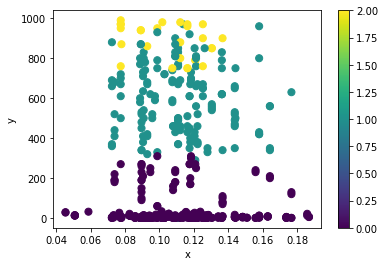

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
fig,ax=plt.subplots()
merged_dataset['Kmeans_cluster']=simple_k_means(merged_dataset[['AADT','ADT','Average','HIGHWAY','SECTION LENGTH']],n_clusters=max_index+2,score_metric='euclidean')['model'].fit_predict(merged_dataset[['AADT','ADT','Average','HIGHWAY','SECTION LENGTH']])
scatter = ax.scatter(merged_dataset['Average'],merged_dataset['AADT'], c=merged_dataset['Kmeans_cluster'] ,s=50)

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
plt.draw()

**Task4**

In [ ]:
merged_dataset.drop(columns=['Date'],inplace=True)

For decision tree classifier we will keep the target variable as the clusters that we found from the last task every thing else is the features

In [ ]:
y=merged_dataset['Kmeans_cluster']
X=merged_dataset.drop(columns=['Kmeans_cluster'])

Split in 70-30 for train test

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


Train the classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Check the accuracy on test data and also how many data points were mis predicted by the model

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Number of mislabeled points out of a total 176 points : 0
Accuracy: 1.0


Show the decision tree

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


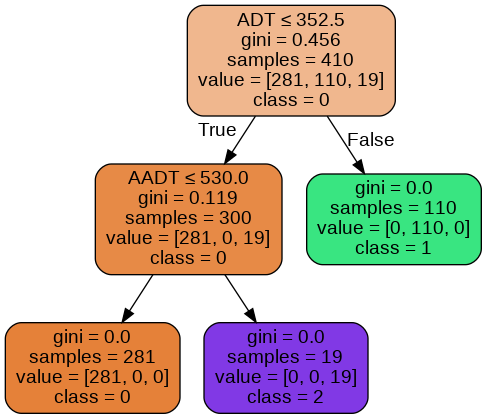

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

Now train the Naive Bayes model and do the same for it

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 176 points : 3


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9829545454545454
